In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
style.use('ggplot')

In [92]:
X = np.array([[1, 2],
             [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

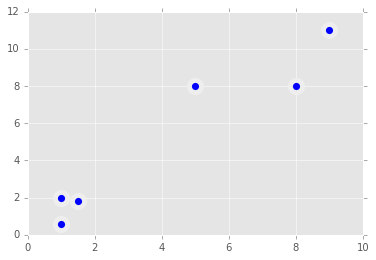

In [93]:
plt.scatter(X[:, 0], X[:, 1], s=150, linewidths=5, zorder=10)

In [94]:
clf = KMeans(n_clusters=2)

In [95]:
clf.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [96]:
centroids = clf.cluster_centers_
labels = clf.labels_
labels

array([1, 1, 0, 0, 1, 0])

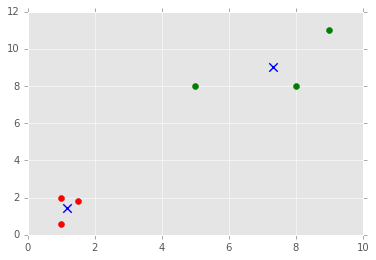

In [97]:
colors = ["g.", "r.", "c.", "y."]
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], colors[labels[i]], markersize=12)
plt.scatter(centroids[:,0], centroids[:,1], marker="x", s=1, linewidths=12, zorder=10)

In [98]:
df = pd.read_excel("titanic.xls")
df.drop(['body', 'name'], 1, inplace=True)
df.convert_objects(pd.to_numeric)
df.fillna(0, inplace=True)
print (df.head())

C:\Users\pradeepb\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


   pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  embarked boat                        home.dest  
0        S    2                     St Louis, MO  
1        S   11  Montreal, PQ / Chesterville, ON  
2        S    0  Montreal, PQ / Chesterville, ON  
3        S    0  Montreal, PQ / Chesterville, ON  
4        S    0  Montreal, PQ / Chesterville, ON  


In [99]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
    return df


In [103]:
df = handle_non_numerical_data(df)
print (df.head())

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     761  211.3375    121   
1       1         1    1   0.9167      1      2     512  151.5500     19   
2       1         0    0   2.0000      1      2     512  151.5500     19   
3       1         0    1  30.0000      1      2     512  151.5500     19   
4       1         0    0  25.0000      1      2     512  151.5500     19   

   embarked  boat  home.dest  
0         2     1        355  
1         2    16        336  
2         2     0        336  
3         2     0        336  
4         2     0        336  


In [138]:
# apply K-Means clusttering
X = np.array(df.drop(['survived'],1)).astype(float)
X = preprocessing.scale(X)
y = np.array(df['survived'])
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [140]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.7035905271199389
